In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
df = pd.read_excel("Final_CFD2023.xlsx")

In [130]:
df.head()

,ID *,1,2,3,4,5,6,7,8,Total,additional points,Final
0,21B050603,2.5,4.5,4.0,1.5,3.5,2.0,1.0,1.0,20.0,5.0,25.0
1,21B050604,0.0,1.5,1.5,0.5,0.5,1.0,0.0,0.0,5.0,5.0,10.0
2,21B050606,0.0,2.0,2.0,0.5,0.5,1.0,0.0,0.0,6.0,5.0,11.0
3,21B050607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,21B050608,0.5,3.5,1.5,1.0,3.5,0.0,0.0,0.0,10.0,5.0,15.0


#### Статус допущенности студента

In [131]:
df["Allowed"] = 1

In [132]:
df.loc[df.isnull()[1] == True, "Allowed"] = 0
df

,ID *,1,2,3,4,5,6,7,8,Total,additional points,Final,Allowed
0,21B050603,2.5,4.5,4.0,1.5,3.5,2.0,1.0,1.0,20.0,5.0,25.0,1
1,21B050604,0.0,1.5,1.5,0.5,0.5,1.0,0.0,0.0,5.0,5.0,10.0,1
2,21B050606,0.0,2.0,2.0,0.5,0.5,1.0,0.0,0.0,6.0,5.0,11.0,1
3,21B050607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0
4,21B050608,0.5,3.5,1.5,1.0,3.5,0.0,0.0,0.0,10.0,5.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21B050628,0.0,2.5,1.5,0.0,1.5,1.0,1.5,0.5,8.5,5.0,13.5,1
72,20B070742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0
73,20B050490,4.5,4.5,3.0,3.0,1.5,0.0,1.5,0.0,18.0,5.0,23.0,1
74,21B050618,0.0,2.5,2.0,1.0,2.0,1.5,0.0,0.0,9.0,5.0,14.0,1


In [34]:
df.fillna(value=0, inplace=True)
df

,ID *,1,2,3,4,5,6,7,8,Total,additional points,Final,Allowed
0,21B050603,2.5,4.5,4.0,1.5,3.5,2.0,1.0,1.0,20.0,5.0,25.0,1
1,21B050604,0.0,1.5,1.5,0.5,0.5,1.0,0.0,0.0,5.0,5.0,10.0,1
2,21B050606,0.0,2.0,2.0,0.5,0.5,1.0,0.0,0.0,6.0,5.0,11.0,1
3,21B050607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,21B050608,0.5,3.5,1.5,1.0,3.5,0.0,0.0,0.0,10.0,5.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21B050628,0.0,2.5,1.5,0.0,1.5,1.0,1.5,0.5,8.5,5.0,13.5,1
72,20B070742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73,20B050490,4.5,4.5,3.0,3.0,1.5,0.0,1.5,0.0,18.0,5.0,23.0,1
74,21B050618,0.0,2.5,2.0,1.0,2.0,1.5,0.0,0.0,9.0,5.0,14.0,1


#### Сколько студентов не были допущены к экзамену?

In [133]:
(df["Allowed"] == 0).sum()

14

#### How many students are passed CFD course?

In [134]:
len(df[df["Final"] >= 20])

26

#### How many students get FX?

In [135]:
len(df[(df["Final"] >= 10) & (df["Final"] < 20)])

26

#### How many students failed?

In [136]:
len(df[df["Final"] < 10])

24

In [137]:
len(df[df["Total"] >= 20])

15

In [138]:
len(df[(df["Total"] >= 10) & (df["Total"] < 20)])

25

In [139]:
len(df[df["Total"] < 10])

36

In [140]:
labels = "Сдали Пересдача Провалили".split()
scores_with_bonus = [len(df[df["Final"] >= 20]), len(df[(df["Final"] >= 10) & (df["Final"] < 20)]), len(df[df["Final"] < 10])]
scores_no_bonus = [len(df[df["Total"] >= 20]), len(df[(df["Total"] >= 10) & (df["Total"] < 20)]), len(df[df["Total"] < 10])]

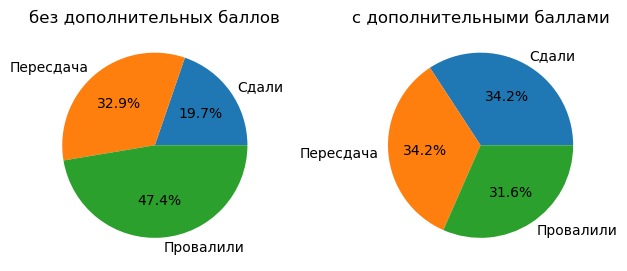

In [141]:
fig, ax = plt.subplots(1, 2)

ax[0].pie(x=scores_no_bonus, labels=labels, autopct='%1.1f%%')
ax[0].set_title("без дополнительных баллов")

ax[1].pie(x=scores_with_bonus, labels=labels, autopct='%1.1f%%')
ax[1].set_title("с дополнительными баллами")

plt.tight_layout();

In [142]:
df["Curve"] = df["Total"]*40/df["Total"].max()
df["Curve (bonus)"] = df["Final"]*40/df["Final"].max()

In [143]:
df[["ID *", "Total", "Final", "Curve", "Curve (bonus)"]]

,ID *,Total,Final,Curve,Curve (bonus)
0,21B050603,20.0,25.0,29.090909,30.769231
1,21B050604,5.0,10.0,7.272727,12.307692
2,21B050606,6.0,11.0,8.727273,13.538462
3,21B050607,0.0,0.0,0.000000,0.000000
4,21B050608,10.0,15.0,14.545455,18.461538
...,...,...,...,...,...
71,21B050628,8.5,13.5,12.363636,16.615385
72,20B070742,0.0,0.0,0.000000,0.000000
73,20B050490,18.0,23.0,26.181818,28.307692
74,21B050618,9.0,14.0,13.090909,17.230769


In [144]:
scores_curve_with_bonus = [len(df[df["Curve (bonus)"] >= 20]), len(df[(df["Curve (bonus)"] >= 10) & (df["Curve (bonus)"] < 20)]), len(df[df["Curve (bonus)"] < 10])]
scores_curve_no_bonus = [len(df[df["Curve"] >= 20]), len(df[(df["Curve"] >= 10) & (df["Curve"] < 20)]), len(df[df["Curve"] < 10])]

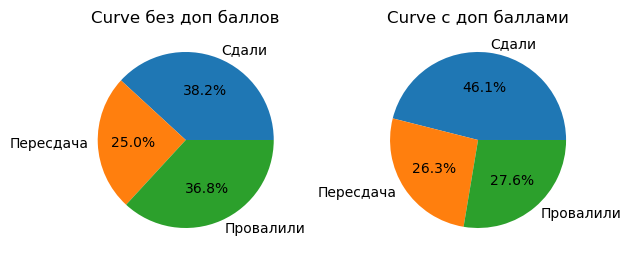

In [145]:
fig, ax = plt.subplots(1, 2)

ax[0].pie(x=scores_curve_no_bonus, labels=labels, autopct='%1.1f%%')
ax[0].set_title("Curve без доп баллов")

ax[1].pie(x=scores_curve_with_bonus, labels=labels, autopct='%1.1f%%')
ax[1].set_title("Curve с доп баллами")

plt.tight_layout();

In [146]:
allowed_students = df["Allowed"].sum()

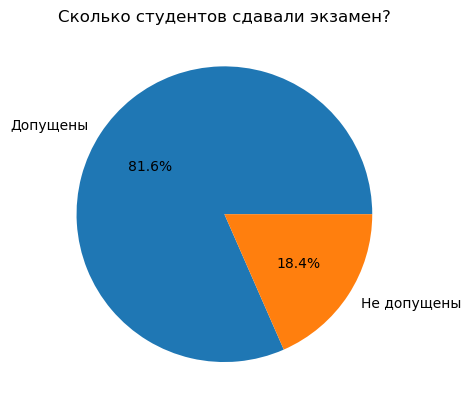

In [147]:
fig, ax = plt.subplots()

ax.pie(x=[allowed_students, len(df["Allowed"]) - allowed_students], labels=["Допущены", "Не допущены"], autopct='%1.1f%%')
ax.set_title("Сколько студентов сдавали экзамен?");

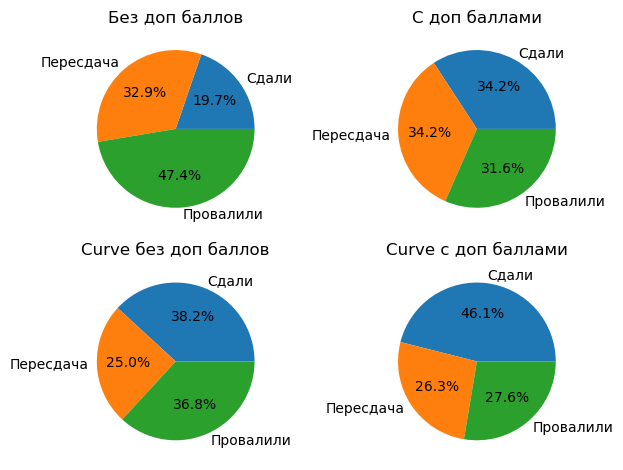

In [148]:
fig, ax = plt.subplots(2, 2)
labels = "Сдали Пересдача Провалили".split()
ax[0, 0].pie(x=scores_no_bonus, labels=labels, autopct='%1.1f%%')
ax[0, 0].set_title("Без доп баллов")

ax[0, 1].pie(x=scores_with_bonus, labels=labels, autopct='%1.1f%%')
ax[0, 1].set_title("С доп баллами")

ax[1, 0].pie(x=scores_curve_no_bonus, labels=labels, autopct='%1.1f%%')
ax[1, 0].set_title("Curve без доп баллов")

ax[1, 1].pie(x=scores_curve_with_bonus, labels=labels, autopct='%1.1f%%')
ax[1, 1].set_title("Curve с доп баллами")

plt.tight_layout();

In [165]:
tasks = range(1, 9)
students = [0] * 8
for task in tasks:
#     print(df[task].median(), f"{df[task].mean():.2f}")
    print((df[task] == 0).sum(), f"{df[task].mean():.2f}")
#     students[task - 1] = ((df[task] == 0) & (df["Allowed"] == 1)).sum()
    students[task - 1] = (df[task] == 0).sum()

students

24 1.52
7 2.73
3 2.45
9 1.45
12 2.46
25 0.94
24 0.97
30 0.74


[24, 7, 3, 9, 12, 25, 24, 30]

In [166]:
student_counts = len(df["ID *"])

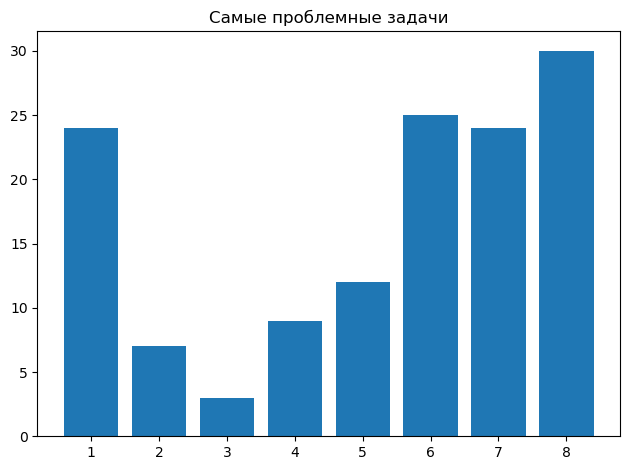

In [167]:
fig, ax = plt.subplots()

ax.bar(tasks, students, label=tasks)
ax.set_title("Самые проблемные задачи")
plt.tight_layout()

Как мы видим на этом гистограмме больше всего проблем у студентов возникли проблемы в задачах с теорией, методом конечных объемов а также с примением определенных методов для двумерных случаев (1, 6, 7, 8). Самыми легкими оказались задачи связанные с определением типа частичного дифференциального уравнения, нахождением коэффициентов для схемы конечнных разностей, обезразмерированием и менее сложным найти условие стабильности (2, 3, 4, 5).

#### Top 15 students who passed exam

In [179]:
df[df["Allowed"] == 1].sort_values(by=["Final"], ascending=False).head(15)

,ID *,1,2,3,4,5,6,7,8,Total,additional points,Final,Allowed,Curve,Curve (bonus)
25,21B050620,4.5,2.0,3.0,2.0,4.0,2.0,5.0,5.0,27.5,5.0,32.5,1,40.000000,40.000000
38,21B050650,4.5,5.0,4.0,2.0,4.0,3.0,2.0,2.0,26.5,5.0,31.5,1,38.545455,38.769231
50,20B050350,4.5,4.0,4.0,3.0,3.5,4.5,1.0,1.0,25.5,5.0,30.5,1,37.090909,37.538462
23,21B050619,4.5,4.5,2.0,2.0,4.0,1.0,3.0,3.0,24.0,5.0,29.0,1,34.909091,35.692308
62,21B050642,0.0,4.5,1.5,1.5,4.0,1.5,5.5,5.5,24.0,5.0,29.0,1,34.909091,35.692308
56,21B050638,4.5,4.5,3.5,4.0,4.0,1.5,1.0,1.0,24.0,5.0,29.0,1,34.909091,35.692308
69,21B050649,4.5,4.5,3.0,2.0,4.0,1.0,2.0,2.0,23.0,5.0,28.0,1,33.454545,34.461538
75,21B050617,4.5,1.5,4.0,3.0,4.0,1.5,4.0,NaN,22.5,5.0,27.5,1,32.727273,33.846154
45,21B051138,2.0,5.0,4.0,3.5,4.0,3.5,0.0,0.0,22.0,5.0,27.0,1,32.000000,33.230769
14,20B050356,2.0,4.5,3.0,2.5,4.0,2.0,2.0,1.0,21.0,5.0,26.0,1,30.545455,32.000000
